## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
initial_mouse_metadata_df = pd.read_csv(mouse_metadata_path)
initial_study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df = initial_mouse_metadata_df.copy()
study_results_df = initial_study_results_df.copy()

mouse_metadata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_results_df = pd.merge(study_results_df, mouse_metadata_df, how='left', on="Mouse ID")



# Display the data table for preview
combined_results_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
combined_results_df.info()
mouse_metadata_df.info()
study_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non

In [10]:
# Checking the number of mice.
combined_results = combined_results_df['Mouse ID'].unique()
len(combined_results)

249

In [12]:
duplicated_mouse = combined_results_df.loc[combined_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mouse

duplicate_data = combined_results_df[combined_results_df['Mouse ID'] == 'g989']
duplicate_data

clean_df = combined_results_df[combined_results_df['Mouse ID'] != 'g989' ]
clean_df

count_mouse = clean_df['Mouse ID'].nunique()
count_mouse


248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avg = clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
avg

median_tumor = clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
median_tumor

variance = clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
variance

std_dev = clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
std_dev

sem_tumor = clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
sem_tumor

summary_df  = pd.DataFrame({ 'Mean': avg,
                             'Median': median_tumor,
                             'Variance': variance,
                             'Standard Dev': std_dev,
                             'SEM': sem_tumor})
summary_df


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std',"sem"]})
summary_table2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

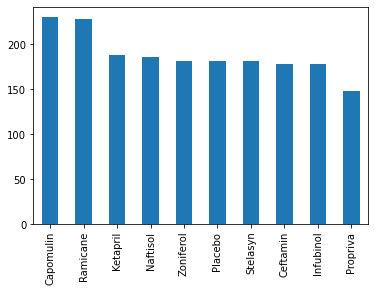

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_chart = clean_df['Drug Regimen'].value_counts()
drug_regimen_chart

drug_regimen_chart.plot(kind='bar')
plt.show()


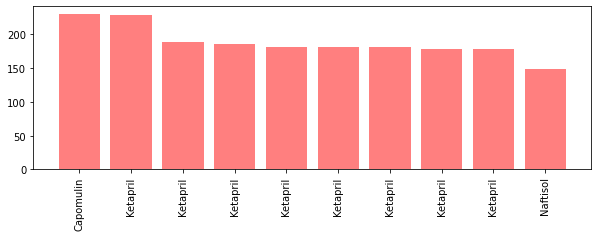

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

len_d_r = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(len_d_r))
tick_d_r = [value for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, len_d_r, color='r', alpha=0.5, align="center")
plt.xticks(tick_d_r, clean_df["Drug Regimen"], rotation="vertical")

plt.show()

Text(0, 0.5, 'Sex')

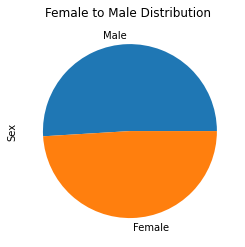

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_count = clean_df['Sex'].value_counts()
labels = ["Female", "Male"]

sizes = mice_sex_count  
colors = ["blue", "yellow"]

explode = (0.1, 0)

fm_chart = mice_sex_count.plot(kind="pie", y=sizes, title=("Female to Male Distribution "))
fm_chart.set_ylabel("Sex")

Text(0.5, 1.0, 'Female to Male Distribution')

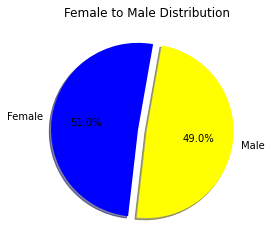

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title(label="Female to Male Distribution")


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
mouse_timepoint_df = mouse_timepoint.reset_index()
mouse_timepoint_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tp_merge_df = mouse_timepoint_df.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
mouse_tp_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
mg =  mouse_tp_merge_df['Tumor Volume (mm3)'].tolist()
len(mg)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mouse_tp_merge_df.loc[mouse_tp_merge_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] 

     
    # add subset 
    tumor_vol.append( final_tumor_vol)  
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q-lower_q
     
print(f"The lower quartile of tumor is: {lower_q}")
print(f"The upper quartile of tumor is: {upper_q}")
print(f"The interquartile range of tumor is: {IQR}")
print(f"The the median of tumor is: {quartiles[0.5]} ")



# Determine outliers using upper and lower bounds
lower_bound = lower_q - (1.5*IQR)
upper_bound = upper_q - (1.5*IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound )]
print(f"Mouse with { treatment}'s potential outliers: {outliers}")


The lower quartile of tumor is: 48.72207785
The upper quartile of tumor is: 64.29983003
The interquartile range of tumor is: 15.577752179999997
The the median of tumor is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 40.93320176 could be outliers.
Mouse with Ceftamin's potential outliers: 3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64


## Line and Scatter Plots

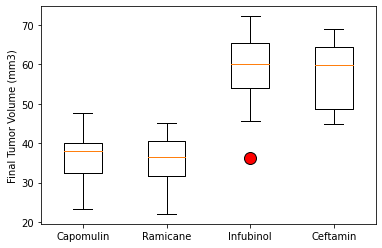

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
t_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot( tumor_vol, labels = treatments,flierprops=t_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Correlation and Regression